# Imporing Library

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
!pip3 install catboost
!pip install scikit-optimize

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Dataset Loading

In [73]:
# Load your dataset
url = 'https://raw.githubusercontent.com/Gladiator07/Harvestify/master/Data-processed/crop_recommendation.csv'
data = pd.read_csv(url)
target_col = 'label'
X = data.drop(target_col, axis=1)
y = data[target_col]

In [74]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


In [75]:
data.shape

(2200, 8)

In [76]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.88,82.00,6.50,202.94
1,85,58,41,21.77,80.32,7.04,226.66
2,60,55,44,23.00,82.32,7.84,263.96
3,74,35,40,26.49,80.16,6.98,242.86
4,78,42,42,20.13,81.60,7.63,262.72


# Data Preprocessing

In [77]:
# Step 1: Check for missing values
missing_values = X.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64


In [78]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(2200,)
(1760,)
(440,)


In [80]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)

X_scaled = scaler.transform(X)

# Logistic Regression

**Final Logistic Regression Model**

In [81]:
LogReg_model = LogisticRegression(C=0.001, max_iter=200, penalty=None, solver='saga')

**Accuracy  and F1 Score on Training Data**

In [82]:
# Train the model
LogReg_model.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = LogReg_model.predict(X_train_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Calculate F1 score
train_f1_score = f1_score(y_train, y_train_pred, average='weighted') * 100

print(f"Accuracy (Train Set) of Logistic Regression Model: {train_accuracy:.2f}%")
print(f"F1 Score (Train Set) of Logistic Regression Model: {train_f1_score:.2f}%")

Accuracy (Train Set) of Logistic Regression Model: 99.09%
F1 Score (Train Set) of Logistic Regression Model: 99.09%


**Accuracy  and F1 Score on CV 5 Data**

In [83]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(LogReg_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(LogReg_model, X_train_scaled, y_train, cv=5, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (5-Fold Cross-Validation) of Logistic Regression Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (5-Fold Cross-Validation) of Logistic Regression Model: {mean_f1:.2f}%")

Mean Accuracy (5-Fold Cross-Validation) of Logistic Regression Model: 98.12%
Mean F1 Score (5-Fold Cross-Validation) of Logistic Regression Model: 98.09%


**Accuracy  and F1 Score on CV 10**


In [84]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(LogReg_model, X_train_scaled, y_train, cv=10, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(LogReg_model, X_train_scaled, y_train, cv=10, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (10-Fold Cross-Validation) of Logistic Regression Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (10-Fold Cross-Validation) of Logistic Regression Model: {mean_f1:.2f}%")

Mean Accuracy (10-Fold Cross-Validation) of Logistic Regression Model: 98.18%
Mean F1 Score (10-Fold Cross-Validation) of Logistic Regression Model: 98.15%


**Accuracy  and F1 Score on Test Data**

In [85]:
# Make predictions on the test data
y_test_pred = LogReg_model.predict(X_test_scaled)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

print(f"Accuracy (Test Set) of Logistic Regression Model: {test_accuracy:.2f}%")
print(f"F1 Score (Test Set) of Logistic Regression Model: {f1:.2f}%")

Accuracy (Test Set) of Logistic Regression Model: 97.05%
F1 Score (Test Set) of Logistic Regression Model: 97.04%


**Sample Prediction**

In [86]:
n = 1204

sample_record = X_train_scaled[n]

# changing the input_data to a numpy array
sample_record = np.asarray(sample_record)

# reshape the np array as we are predicting for one instance
sample_record = sample_record.reshape(1,-1)

prediction = LogReg_model.predict(sample_record)
print(prediction)
print(y_train.iloc[n])

['orange']
orange


In [87]:
from sklearn.metrics import accuracy_score

# Predict using the trained model
y_pred = LogReg_model.predict(X_scaled)

# Flatten y_pred to make it 1-dimensional
y_pred = y_pred.flatten()

# Convert y_pred to a pandas Series with the same shape as y
import pandas as pd
y_pred_series = pd.Series(y_pred, index=y.index)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_series)

print("Accuracy:", accuracy)

# Calculate the number of misclassified cases
misclassified_cases = len(y) - int(accuracy * len(y))

print("Number of misclassified cases:", misclassified_cases)
print("Total number of instances:", len(y))

# Find and print the misclassified rows
misclassified_indices = y.index[y != y_pred_series]
misclassified_rows = X.iloc[misclassified_indices]  # Assuming X is a DataFrame containing your feature data

print("Misclassified Rows:")
for i, row in misclassified_rows.iterrows():
    print(f"Row {i}: {row}")

Accuracy: 0.9868181818181818
Number of misclassified cases: 29
Total number of instances: 2200
Misclassified Rows:
Row 13: N              93.00
P              56.00
K              36.00
temperature    24.01
humidity       82.06
ph              6.98
rainfall      185.28
Name: 13, dtype: float64
Row 42: N              83.00
P              60.00
K              36.00
temperature    25.60
humidity       80.15
ph              6.90
rainfall      200.83
Name: 42, dtype: float64
Row 45: N              91.00
P              35.00
K              38.00
temperature    24.90
humidity       80.53
ph              6.13
rainfall      183.68
Name: 45, dtype: float64
Row 52: N              93.00
P              56.00
K              42.00
temperature    23.86
humidity       82.23
ph              7.38
rainfall      195.09
Name: 52, dtype: float64
Row 58: N              71.00
P              46.00
K              40.00
temperature    20.28
humidity       82.12
ph              7.24
rainfall      191.95
Name: 58, 

Confusion Matrix:


<Axes: >

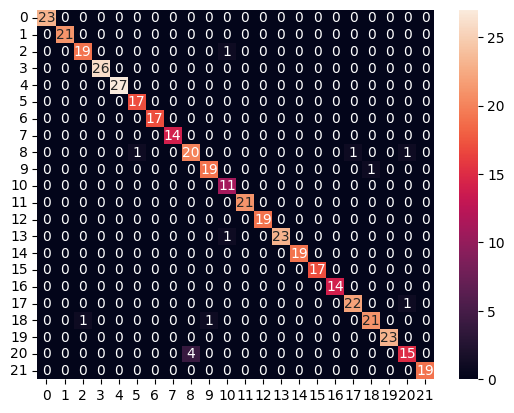

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)

In [89]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

#Decision Tree

In [90]:
# Use the parameters from combination number 109
best_params_dt = {
    'criterion': 'gini',
    'splitter': 'best',
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': None,
    'random_state': 42,
    'ccp_alpha': 0.0
}

# Create the Decision Tree model using the best parameters
DT_model = DecisionTreeClassifier(criterion=best_params_dt['criterion'],
                                       splitter=best_params_dt['splitter'],
                                       max_depth=best_params_dt['max_depth'],
                                       min_samples_split=best_params_dt['min_samples_split'],
                                       min_samples_leaf=best_params_dt['min_samples_leaf'],
                                       max_features=best_params_dt['max_features'],
                                       random_state=best_params_dt['random_state'],
                                       ccp_alpha=best_params_dt['ccp_alpha'])

# Train the Decision Tree model using the entire training dataset
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

**Accuracy  and F1 Score on Training Data**

In [91]:
model_name = DT_model

In [92]:
# Make predictions on the training data
y_train_pred = model_name.predict(X_train)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Calculate F1 score
train_f1_score = f1_score(y_train, y_train_pred, average='weighted') * 100

print(f"Accuracy (Train Set) of Decision Tree Model: {train_accuracy:.2f}%")
print(f"F1 Score (Train Set) of Decision Tree Model: {train_f1_score:.2f}%")

Accuracy (Train Set) of Decision Tree Model: 99.77%
F1 Score (Train Set) of Decision Tree Model: 99.77%


**Accuracy  and F1 Score on CV 5 Data**

In [93]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(model_name, X_train, y_train, cv=5, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(model_name, X_train, y_train, cv=5, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (5-Fold Cross-Validation) of Decision Tree Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (5-Fold Cross-Validation) of Decision Tree Model: {mean_f1:.2f}%")

Mean Accuracy (5-Fold Cross-Validation) of Decision Tree Model: 98.64%
Mean F1 Score (5-Fold Cross-Validation) of Decision Tree Model: 98.60%


**Accuracy  and F1 Score on CV 10**


In [94]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(model_name, X_train, y_train, cv=10, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(model_name, X_train, y_train, cv=10, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (10-Fold Cross-Validation) of Decision Tree Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (10-Fold Cross-Validation) of Decision Tree Model: {mean_f1:.2f}%")

Mean Accuracy (10-Fold Cross-Validation) of Decision Tree Model: 98.30%
Mean F1 Score (10-Fold Cross-Validation) of Decision Tree Model: 98.13%


**Accuracy  and F1 Score on Test Data**

In [95]:
# Make predictions on the test data
y_test_pred = model_name.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

print(f"Accuracy (Test Set) of Decision Tree Model: {test_accuracy:.2f}%")
print(f"F1 Score (Test Set) of Decision Tree Model: {f1:.2f}%")

Accuracy (Test Set) of Decision Tree Model: 98.64%
F1 Score (Test Set) of Decision Tree Model: 98.63%


**Sample Prediction**

In [96]:
from sklearn.metrics import accuracy_score

# Predict using the trained model
y_pred = model_name.predict(X)

# Flatten y_pred to make it 1-dimensional
y_pred = y_pred.flatten()

# Convert y_pred to a pandas Series with the same shape as y
import pandas as pd
y_pred_series = pd.Series(y_pred, index=y.index)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_series)

print("Accuracy:", accuracy)

# Calculate the number of misclassified cases
misclassified_cases = len(y) - int(accuracy * len(y))

print("Number of misclassified cases:", misclassified_cases)
print("Total number of instances:", len(y))

# Find and print the misclassified rows
misclassified_indices = y.index[y != y_pred_series]
misclassified_rows = X.iloc[misclassified_indices]  # Assuming X is a DataFrame containing your feature data

# print("Misclassified Rows:")
# for i, row in misclassified_rows.iterrows():
#     print(f"Row {i}: {row}")

Accuracy: 0.9954545454545455
Number of misclassified cases: 10
Total number of instances: 2200


In [97]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.40,92.18,6.63,102.94
752,37,79,19,27.54,69.35,7.14,69.41
892,7,73,25,27.52,63.13,7.29,45.21
1041,101,70,48,25.36,75.03,6.01,116.55
1179,0,17,30,35.47,47.97,6.28,97.79


In [98]:
X_train_ndarray = X_train.values

In [99]:
n = 1204

sample_record = X_train_ndarray[n]

# changing the input_data to a numpy array
sample_record = np.asarray(sample_record)

# reshape the np array as we are predicting for one instance
sample_record = sample_record.reshape(1,-1)

prediction = model_name.predict(sample_record)
print("Prediction:", prediction[0])
print("Actual: ", y_train.iloc[n])

Prediction: orange
Actual:  orange


#KNN

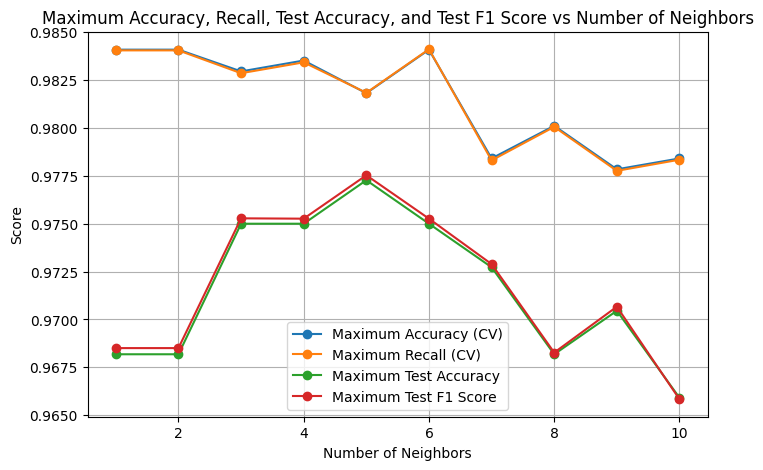

In [100]:
url = 'results_table_knn.csv'
results_table_knn = pd.read_csv(url)

# Convert the results_table_knn into a DataFrame
results_df = pd.DataFrame(results_table_knn)

# Group the results by 'Number of Neighbors' and find the maximum accuracy, recall, test accuracy, and test F1 score
max_accuracy_by_neighbors = results_df.groupby('Number of Neighbors')['Average Accuracy (5-fold)'].max()
max_recall_by_neighbors = results_df.groupby('Number of Neighbors')['Average F1 Score (5-fold)'].max()
max_test_accuracy_by_neighbors = results_df.groupby('Number of Neighbors')['Test Accuracy'].max()
max_test_f1_by_neighbors = results_df.groupby('Number of Neighbors')['Test F1 Score'].max()

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(max_accuracy_by_neighbors.index, max_accuracy_by_neighbors.values, marker='o', label='Maximum Accuracy (CV)')
plt.plot(max_recall_by_neighbors.index, max_recall_by_neighbors.values, marker='o', label='Maximum Recall (CV)')
plt.plot(max_test_accuracy_by_neighbors.index, max_test_accuracy_by_neighbors.values, marker='o', label='Maximum Test Accuracy')
plt.plot(max_test_f1_by_neighbors.index, max_test_f1_by_neighbors.values, marker='o', label='Maximum Test F1 Score')
plt.title('Maximum Accuracy, Recall, Test Accuracy, and Test F1 Score vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
best_params = {
    'n_neighbors': 5,
    'weights': 'distance',
    'algorithm': 'brute',
    'metric': 'manhattan'
}

# Create the KNN model using the best parameters
KNN_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                      weights=best_params['weights'],
                                      algorithm=best_params['algorithm'],
                                      metric=best_params['metric'],
                                      p = 1,
                                      n_jobs=-1)  # Utilize all available CPU cores

# Train the best model using the entire training dataset
KNN_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_jobs=-1, p=1,
                     weights='distance')

**Accuracy  and F1 Score on Training Data**

In [102]:
model_name = KNN_model

In [103]:
# Make predictions on the training data
y_train_pred = model_name.predict(X_train_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Calculate F1 score
train_f1_score = f1_score(y_train, y_train_pred, average='weighted') * 100

print(f"Accuracy (Train Set) of Decision Tree Model: {train_accuracy:.2f}%")
print(f"F1 Score (Train Set) of Decision Tree Model: {train_f1_score:.2f}%")

Accuracy (Train Set) of Decision Tree Model: 100.00%
F1 Score (Train Set) of Decision Tree Model: 100.00%


**Accuracy  and F1 Score on CV 5 Data**

In [104]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(model_name, X_train_scaled, y_train, cv=5, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(model_name, X_train_scaled, y_train, cv=5, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (5-Fold Cross-Validation) of Decision Tree Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (5-Fold Cross-Validation) of Decision Tree Model: {mean_f1:.2f}%")

Mean Accuracy (5-Fold Cross-Validation) of Decision Tree Model: 98.18%
Mean F1 Score (5-Fold Cross-Validation) of Decision Tree Model: 98.18%


**Accuracy  and F1 Score on CV 10**


In [105]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(model_name, X_train_scaled, y_train, cv=10, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(model_name, X_train_scaled, y_train, cv=10, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (10-Fold Cross-Validation) of Decision Tree Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (10-Fold Cross-Validation) of Decision Tree Model: {mean_f1:.2f}%")

Mean Accuracy (10-Fold Cross-Validation) of Decision Tree Model: 98.24%
Mean F1 Score (10-Fold Cross-Validation) of Decision Tree Model: 98.22%


**Accuracy  and F1 Score on Test Data**

In [106]:
# Make predictions on the test data
y_test_pred = model_name.predict(X_test_scaled)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

print(f"Accuracy (Test Set) of Decision Tree Model: {test_accuracy:.2f}%")
print(f"F1 Score (Test Set) of Decision Tree Model: {f1:.2f}%")

Accuracy (Test Set) of Decision Tree Model: 97.73%
F1 Score (Test Set) of Decision Tree Model: 97.75%


**Sample Prediction**

In [107]:
from sklearn.metrics import accuracy_score

# Predict using the trained model
y_pred = model_name.predict(X_scaled)

# Flatten y_pred to make it 1-dimensional
y_pred = y_pred.flatten()

# Convert y_pred to a pandas Series with the same shape as y
import pandas as pd
y_pred_series = pd.Series(y_pred, index=y.index)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_series)

print("Accuracy:", accuracy)

# Calculate the number of misclassified cases
misclassified_cases = len(y) - int(accuracy * len(y))

print("Number of misclassified cases:", misclassified_cases)
print("Total number of instances:", len(y))

# Find and print the misclassified rows
misclassified_indices = y.index[y != y_pred_series]
misclassified_rows = X.iloc[misclassified_indices]  # Assuming X is a DataFrame containing your feature data

# print("Misclassified Rows:")
# for i, row in misclassified_rows.iterrows():
#     print(f"Row {i}: {row}")

Accuracy: 0.9954545454545455
Number of misclassified cases: 10
Total number of instances: 2200


In [108]:
n = 1204

sample_record = X_train_scaled[n]

# changing the input_data to a numpy array
sample_record = np.asarray(sample_record)

# reshape the np array as we are predicting for one instance
sample_record = sample_record.reshape(1,-1)

prediction = model_name.predict(sample_record)
print("Prediction:", prediction[0])
print("Actual: ", y_train.iloc[n])

Prediction: orange
Actual:  orange


In [109]:
max_test_accuracy_by_neighbors = results_df.groupby('Number of Neighbors')['Test Accuracy'].max()
print(max_test_accuracy_by_neighbors)

Number of Neighbors
1    0.97
2    0.97
3    0.97
4    0.97
5    0.98
6    0.97
7    0.97
8    0.97
9    0.97
10   0.97
Name: Test Accuracy, dtype: float64


#CatBoost

In [111]:
from catboost import CatBoostClassifier

# Create a CatBoost classifier with default parameters
catboost_model = CatBoostClassifier(depth=8, iterations=738, l2_leaf_reg=1.185260448662222, learning_rate=0.0972918866945795)

# Train the model on the training data
catboost_model.fit(X_train_scaled, y_train)

0:	learn: 2.1657629	total: 248ms	remaining: 3m 2s
1:	learn: 1.7865965	total: 338ms	remaining: 2m 4s
2:	learn: 1.5236326	total: 425ms	remaining: 1m 44s
3:	learn: 1.3229433	total: 518ms	remaining: 1m 34s
4:	learn: 1.1689423	total: 608ms	remaining: 1m 29s
5:	learn: 1.0449305	total: 700ms	remaining: 1m 25s
6:	learn: 0.9341920	total: 791ms	remaining: 1m 22s
7:	learn: 0.8399940	total: 886ms	remaining: 1m 20s
8:	learn: 0.7618580	total: 972ms	remaining: 1m 18s
9:	learn: 0.6899001	total: 1.06s	remaining: 1m 17s
10:	learn: 0.6283715	total: 1.2s	remaining: 1m 19s
11:	learn: 0.5741700	total: 1.34s	remaining: 1m 21s
12:	learn: 0.5297405	total: 1.49s	remaining: 1m 22s
13:	learn: 0.4885406	total: 1.65s	remaining: 1m 25s
14:	learn: 0.4514862	total: 1.8s	remaining: 1m 26s
15:	learn: 0.4170334	total: 1.96s	remaining: 1m 28s
16:	learn: 0.3844881	total: 2.11s	remaining: 1m 29s
17:	learn: 0.3580857	total: 2.26s	remaining: 1m 30s
18:	learn: 0.3320367	total: 2.42s	remaining: 1m 31s
19:	learn: 0.3102465	total

**Accuracy  and F1 Score on Training Data**

In [112]:
model_name = catboost_model

In [113]:
# Make predictions on the training data
y_train_pred = model_name.predict(X_train_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Calculate F1 score
train_f1_score = f1_score(y_train, y_train_pred, average='weighted') * 100

print(f"Accuracy (Train Set) of Decision Tree Model: {train_accuracy:.2f}%")
print(f"F1 Score (Train Set) of Decision Tree Model: {train_f1_score:.2f}%")

Accuracy (Train Set) of Decision Tree Model: 100.00%
F1 Score (Train Set) of Decision Tree Model: 100.00%


**Accuracy  and F1 Score on CV 5 Data**

In [114]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(model_name, X_train_scaled, y_train, cv=5, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(model_name, X_train_scaled, y_train, cv=5, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (5-Fold Cross-Validation) of CatBoost Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (5-Fold Cross-Validation) of CatBoost Model: {mean_f1:.2f}%")

Streaming output truncated to the last 5000 lines.
168:	learn: 0.0119688	total: 17s	remaining: 57.3s
169:	learn: 0.0118823	total: 17.1s	remaining: 57.2s
170:	learn: 0.0117355	total: 17.2s	remaining: 57.1s
171:	learn: 0.0116414	total: 17.3s	remaining: 56.9s
172:	learn: 0.0115578	total: 17.4s	remaining: 56.8s
173:	learn: 0.0114634	total: 17.5s	remaining: 56.7s
174:	learn: 0.0113765	total: 17.6s	remaining: 56.6s
175:	learn: 0.0112863	total: 17.7s	remaining: 56.4s
176:	learn: 0.0112065	total: 17.8s	remaining: 56.3s
177:	learn: 0.0111408	total: 17.9s	remaining: 56.2s
178:	learn: 0.0110735	total: 17.9s	remaining: 56s
179:	learn: 0.0109761	total: 18s	remaining: 55.9s
180:	learn: 0.0109152	total: 18.1s	remaining: 55.8s
181:	learn: 0.0108347	total: 18.2s	remaining: 55.7s
182:	learn: 0.0107706	total: 18.3s	remaining: 55.6s
183:	learn: 0.0106847	total: 18.4s	remaining: 55.4s
184:	learn: 0.0106239	total: 18.5s	remaining: 55.3s
185:	learn: 0.0105461	total: 18.6s	remaining: 55.2s
186:	learn: 0.01044

**Accuracy  and F1 Score on CV 10**


In [115]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(model_name, X_train_scaled, y_train, cv=10, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(model_name, X_train_scaled, y_train, cv=10, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (10-Fold Cross-Validation) of Decision Tree Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (10-Fold Cross-Validation) of Decision Tree Model: {mean_f1:.2f}%")

Streaming output truncated to the last 5000 lines.
168:	learn: 0.0105808	total: 17.2s	remaining: 58s
169:	learn: 0.0104865	total: 17.3s	remaining: 57.9s
170:	learn: 0.0104114	total: 17.4s	remaining: 57.7s
171:	learn: 0.0103172	total: 17.5s	remaining: 57.6s
172:	learn: 0.0102470	total: 17.6s	remaining: 57.4s
173:	learn: 0.0101433	total: 17.7s	remaining: 57.3s
174:	learn: 0.0100496	total: 17.8s	remaining: 57.1s
175:	learn: 0.0099643	total: 17.9s	remaining: 57.1s
176:	learn: 0.0099152	total: 18s	remaining: 57.1s
177:	learn: 0.0098480	total: 18.2s	remaining: 57.2s
178:	learn: 0.0097892	total: 18.4s	remaining: 57.3s
179:	learn: 0.0097109	total: 18.5s	remaining: 57.4s
180:	learn: 0.0096044	total: 18.7s	remaining: 57.5s
181:	learn: 0.0095362	total: 18.8s	remaining: 57.6s
182:	learn: 0.0094849	total: 19s	remaining: 57.6s
183:	learn: 0.0093311	total: 19.2s	remaining: 57.7s
184:	learn: 0.0092660	total: 19.3s	remaining: 57.8s
185:	learn: 0.0091796	total: 19.5s	remaining: 57.9s
186:	learn: 0.00911

**Accuracy  and F1 Score on Test Data**

In [116]:
# Make predictions on the test data
y_test_pred = model_name.predict(X_test_scaled)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

print(f"Accuracy (Test Set) of Decision Tree Model: {test_accuracy:.2f}%")
print(f"F1 Score (Test Set) of Decision Tree Model: {f1:.2f}%")

Accuracy (Test Set) of Decision Tree Model: 99.32%
F1 Score (Test Set) of Decision Tree Model: 99.32%


**Sample Prediction**

In [117]:
from sklearn.metrics import accuracy_score

# Predict using the trained model
y_pred = model_name.predict(X_scaled)

# Flatten y_pred to make it 1-dimensional
y_pred = y_pred.flatten()

# Convert y_pred to a pandas Series with the same shape as y
import pandas as pd
y_pred_series = pd.Series(y_pred, index=y.index)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_series)

print("Accuracy:", accuracy)

# Calculate the number of misclassified cases
misclassified_cases = len(y) - int(accuracy * len(y))

print("Number of misclassified cases:", misclassified_cases)
print("Total number of instances:", len(y))

# Find and print the misclassified rows
misclassified_indices = y.index[y != y_pred_series]
misclassified_rows = X.iloc[misclassified_indices]  # Assuming X is a DataFrame containing your feature data

# print("Misclassified Rows:")
# for i, row in misclassified_rows.iterrows():
#     print(f"Row {i}: {row}")

Accuracy: 0.9986363636363637
Number of misclassified cases: 3
Total number of instances: 2200


In [118]:
n = 1204

sample_record = X_train_scaled[n]

# changing the input_data to a numpy array
sample_record = np.asarray(sample_record)

# reshape the np array as we are predicting for one instance
sample_record = sample_record.reshape(1,-1)

prediction = model_name.predict(sample_record)
print("Prediction:", prediction[0])
print("Actual: ", y_train.iloc[n])

Prediction: ['orange']
Actual:  orange


#SVM

In [119]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [120]:
# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
# Create an SVM classifier
svm_classifier = SVC(C=10, gamma='scale', kernel='linear')

In [122]:
# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

SVC(C=10, kernel='linear')

**Accuracy and F1 score on Training Data**

In [123]:
# Make predictions on the training data
y_train_pred = svm_classifier.predict(X_train_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Calculate F1 score
train_f1_score = f1_score(y_train, y_train_pred, average='weighted') * 100

print(f"Accuracy (Train Set) of SVM Classifier Model: {train_accuracy:.2f}%")
print(f"F1 Score (Train Set) of SVM Classifier Model: {train_f1_score:.2f}%")

Accuracy (Train Set) of SVM Classifier Model: 98.92%
F1 Score (Train Set) of SVM Classifier Model: 98.92%


In [124]:
# accuracy score on testing data
X_test_prediction = svm_classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)
testing_data_f1_score = f1_score(X_test_prediction, y_test, average='macro')

In [125]:
print("Accuracy score on testing data: ", testing_data_accuracy)
print("F1 score on training data: ", testing_data_f1_score)

Accuracy score on testing data:  0.9840909090909091
F1 score on training data:  0.9848043998507507


**Accuracy  and F1 Score on CV 5 Data**

In [126]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=5, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (5-Fold Cross-Validation) of SVM Classifier Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (5-Fold Cross-Validation) of SVM Classifier Model: {mean_f1:.2f}%")

Mean Accuracy (5-Fold Cross-Validation) of SVM Classifier Model: 98.35%
Mean F1 Score (5-Fold Cross-Validation) of SVM Classifier Model: 98.34%


**Accuracy  and F1 Score on CV 10 Data**

In [127]:
# Perform 5-fold cross-validation and calculate accuracy and F1 scores
cross_val_scores_accuracy = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=10, scoring='accuracy')
cross_val_scores_f1 = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=10, scoring='f1_macro')

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = cross_val_scores_accuracy.mean() * 100
mean_f1 = cross_val_scores_f1.mean() * 100

print(f"Mean Accuracy (10-Fold Cross-Validation) of SVM Classifier Model: {mean_accuracy:.2f}%")
print(f"Mean F1 Score (10-Fold Cross-Validation) of SVM Classifier Model: {mean_f1:.2f}%")

Mean Accuracy (10-Fold Cross-Validation) of SVM Classifier Model: 98.47%
Mean F1 Score (10-Fold Cross-Validation) of SVM Classifier Model: 98.45%


**Accuracy  and F1 Score on Test Data**

In [128]:
# Make predictions on the test data
y_test_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

print(f"Accuracy (Test Set) of SVM Classifier Model: {test_accuracy:.2f}%")
print(f"F1 Score (Test Set) of SVM Classifier Model: {f1:.2f}%")

Accuracy (Test Set) of SVM Classifier Model: 98.41%
F1 Score (Test Set) of SVM Classifier Model: 98.41%


**Sample Prediction**

In [129]:
from sklearn.metrics import accuracy_score

# Predict using the trained model
y_pred = svm_classifier.predict(X_scaled)

# Flatten y_pred to make it 1-dimensional
y_pred = y_pred.flatten()

# Convert y_pred to a pandas Series with the same shape as y
import pandas as pd
y_pred_series = pd.Series(y_pred, index=y.index)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_series)

print("Accuracy:", accuracy)

# Calculate the number of misclassified cases
misclassified_cases = len(y) - int(accuracy * len(y))

print("Number of misclassified cases:", misclassified_cases)
print("Total number of instances:", len(y))

# Find and print the misclassified rows
misclassified_indices = y.index[y != y_pred_series]
misclassified_rows = X.iloc[misclassified_indices]  # Assuming X is a DataFrame containing your feature data

# print("Misclassified Rows:")
# for i, row in misclassified_rows.iterrows():
#     print(f"Row {i}: {row}")

Accuracy: 0.9881818181818182
Number of misclassified cases: 26
Total number of instances: 2200


In [130]:
n = 1204

sample_record = X_train_scaled[n]

# changing the input_data to a numpy array
sample_record = np.asarray(sample_record)

# reshape the np array as we are predicting for one instance
sample_record = sample_record.reshape(1,-1)

prediction = svm_classifier.predict(sample_record)
print("Prediction:", prediction[0])
print("Actual: ", y_train.iloc[n])

Prediction: orange
Actual:  orange


#Gradient Boost

In [131]:
# Initialize the model
gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# For regression tasks, use GradientBoostingRegressor

# Train the model
gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [132]:
# accuracy score on training data
X_train_prediction = gradient_boost.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_f1_score = f1_score(X_train_prediction, y_train, average='macro')

In [133]:
print("Accuracy score on training data using Gradient Boost: ", training_data_accuracy)
print("F1 score on training data using Gradient Boost: ", training_data_f1_score)

Accuracy score on training data using Gradient Boost:  1.0
F1 score on training data using Gradient Boost:  1.0


In [134]:
# accuracy score on testing data
X_test_prediction = gradient_boost.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)
testing_data_f1_score = f1_score(X_test_prediction, y_test, average='macro')

In [135]:
print("Accuracy score on testing data using Gradient Boost: ", testing_data_accuracy)
print("F1 score on testing data using Gradient Boost: ", testing_data_f1_score)

Accuracy score on testing data using Gradient Boost:  0.9818181818181818
F1 score on testing data using Gradient Boost:  0.981868945715869


# Lazy Predict

In [136]:
!pip install lazypredict

In [137]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)


 87%|████████▋ | 27/31 [00:08<00:01,  3.37it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[

100%|██████████| 31/31 [00:11<00:00,  2.70it/s]


In [138]:
# Display the model performance table
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
GaussianNB                         1.00               1.00    None      1.00   
RandomForestClassifier             0.99               0.99    None      0.99   
QuadraticDiscriminantAnalysis      0.99               0.99    None      0.99   
BaggingClassifier                  0.99               0.99    None      0.99   
ExtraTreesClassifier               0.99               0.99    None      0.99   
DecisionTreeClassifier             0.99               0.99    None      0.99   
LGBMClassifier                     0.99               0.99    None      0.99   
LabelSpreading                     0.97               0.97    None      0.97   
LabelPropagation                   0.97               0.97    None      0.97   
SVC                                0.97               0.97    None      0.97   
LogisticRegression                 0.96 

# Gaussian Naive Bayes

In [139]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

# Create and fit the Gaussian Naive Bayes classifier on the training data
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the training data
y_train_pred = gnb.predict(X_train_scaled)

# Step 4: Evaluate the classifier's performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
# Calculate the F1 score with the 'macro' average parameter for multiclass classification
train_f1 = f1_score(y_train, y_train_pred, average='macro')

print(f'Training Set Accuracy: {train_accuracy}')
print(f'Training Set F1 Score: {train_f1}')

# Step 3: Make predictions on the testing data
y_pred = gnb.predict(X_test_scaled)

# Step 4: Evaluate the classifier's performance on the test set
test_accuracy = accuracy_score(y_test, y_pred)
# Calculate the F1 score with the 'macro' average parameter for multiclass classification
test_f1 = f1_score(y_test, y_pred, average='macro')

print(f'Test Set Accuracy: {test_accuracy}')
print(f'Test Set F1 Score: {test_f1}')

# Calculate accuracy and F1 score using 5-fold cross-validation
cv_scores_5_fold_accuracy = cross_val_score(gnb, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_5_fold_f1 = cross_val_score(gnb, X_train_scaled, y_train, cv=5, scoring='f1')

# Calculate accuracy and F1 score using 10-fold cross-validation
cv_scores_10_fold_accuracy = cross_val_score(gnb, X_train_scaled, y_train, cv=10, scoring='accuracy')
cv_scores_10_fold_f1 = cross_val_score(gnb, X_train_scaled, y_train, cv=10, scoring='f1')

# Display the results
print(f'5-Fold Cross-Validation Accuracy: {cv_scores_5_fold_accuracy.mean()}')
print(f'5-Fold Cross-Validation F1 Score: {cv_scores_5_fold_f1.mean()}')

print(f'10-Fold Cross-Validation Accuracy: {cv_scores_10_fold_accuracy.mean()}')
print(f'10-Fold Cross-Validation F1 Score: {cv_scores_10_fold_f1.mean()}')


Training Set Accuracy: 0.9948863636363636
Training Set F1 Score: 0.9948353057505227
Test Set Accuracy: 0.9954545454545455
Test Set F1 Score: 0.9955808080808081
5-Fold Cross-Validation Accuracy: 0.9954545454545455
5-Fold Cross-Validation F1 Score: nan
10-Fold Cross-Validation Accuracy: 0.9943181818181819
10-Fold Cross-Validation F1 Score: nan
